<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_14_3_SL_Logistic_Regression__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We classify whether the patient is **diabetic** or not. We will use [diabetes.csv](https://uploads.kodilla.com/bootcamp/ds/14/diabetes.csv) data, which contains diagnostic information about some patients who have been tested for diabetes. The last column in the dataset (**Diabetic**) contains a value of **0** for patients who tested negative for diabetes and **1** for patients who tested positive. This is the variable we're going to predict. Other characteristics are explanatory variables:

- **Pregnancies** - number of pregnancies,
- **PlasmaGlucose** - plasma glucose concentration,
- **DiastolicBloodPressure** - diastolic blood pressure,
- **TricepsThickness** - skin thickness for the triceps muscle,
- **SerumInsulin** - insulin in serums,
- **BMI** - it's probably clear :)
- **DiabetesPedigree** - a feature that assesses the likelihood of developing diabetes based on family history,
- **Age** - age in years.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/14/diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


**Diabetic** is the **y-dependent** variable and the **others** are **X-independent** variables.

In [3]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'

X = diabetes[features]
y = diabetes[target]

print('X')
display(X)
print('\ny:')
display(y)

X


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

## **EDA - Exploratory data analysis** for Classification

We will start the data analysis for the classification problem with the **dependent variable ~ y**. It is important to check whether the classes are balanced, i.e. whether there are equal numbers of them. Let's put **y** in the **Data Series** and then use the **value_counts** method to check the unique classes and the number of occurrences. The **normalize parameter** is set to **False** by default, changing to **True** we will see the percentage of classes - especially with many different unique values, the result is clearer.

In [4]:
pd.Series(y).value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Diabetic, dtype: float64

1/3 of the surveyed people were diabetic. Keep this information in mind because creating a model that always classifies people as non-diabetic will have an accuracy of 66.66%. Of course, such a model will not be good.

Let's check the data types and see if there are any missing values. We will use the **info** method on the entire dataframe.

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


There are **no missing values** and the **data types** that appear are **numeric values**. If there are any missing values in the data, they should be supplemented. However, we cannot fill the missing values on the entire set, because we may be dealing with a data leak. Data missing values are supplemented on the basis of knowledge from the training set, because we assume that the data from the test set are unknown to us. Therefore, if we have deficiencies for a numerical value, we can supplement them with the mean or median from the training set, and deficiencies for the categorical value are supplemented with the mod, i.e. the most frequently occurring category from the training set.

Let's check the distributions using the **describe** method. In this case, we can only do this for **X**, because we already know that **y** is a categorical dependent variable (we also know its distribution).

In [6]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


The total number of observations is 15.000. Mean age is 30 years, the youngest person is 21 and the oldest one is 77 years. Among 75% of the respondents, 6 were pregnant women. Max value of PlasmaGlucose and SerumInsuline are far from mean value what inform us that for those is a high probability of the risk of diabetes. The distribution appears to be right-skewed (positive) one.

Now we are going to compare the **numeric variables X** to the **categorical variable y**. In this case, we'll use **boxplots**. In other problems, apart from numerical variables, a **categorical variable** may appear, then we can use **barplots**, then we will observe what is the distribution of **y** depending on the category.

We create **boxplots** for each variable using **matplotlib**.

Unique values: 15


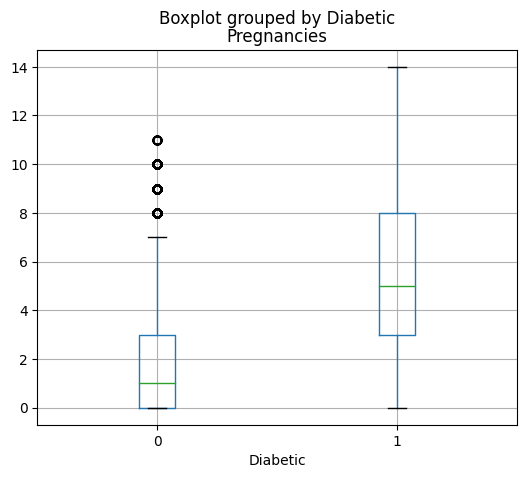

Unique values: 149


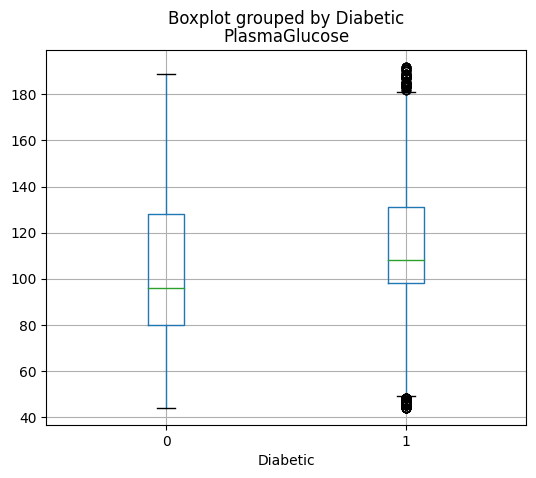

Unique values: 90


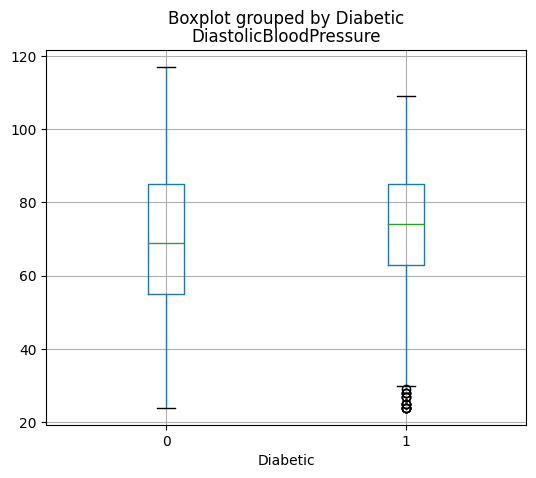

Unique values: 69


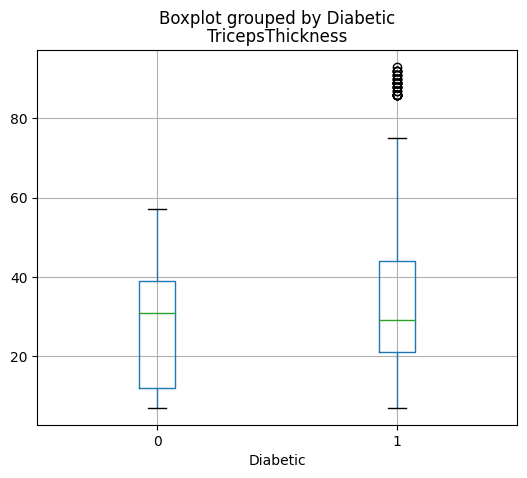

Unique values: 663


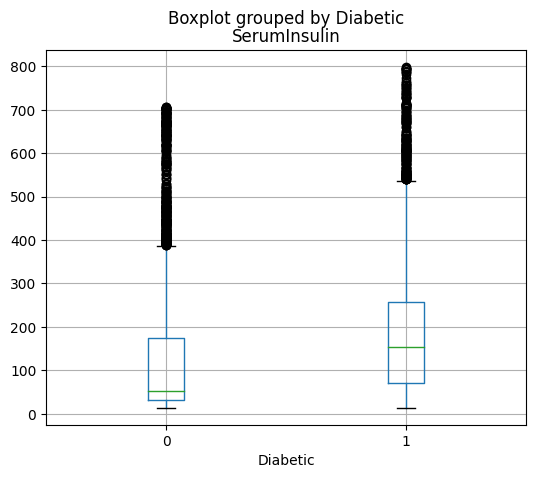

Unique values: 15000


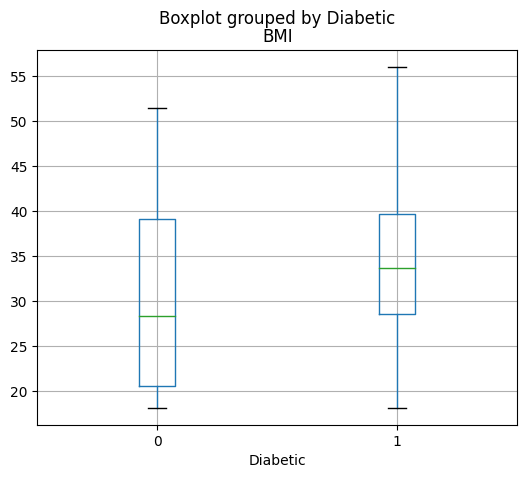

Unique values: 14999


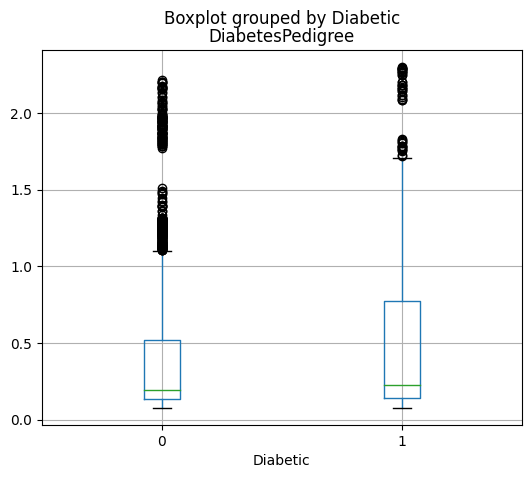

Unique values: 56


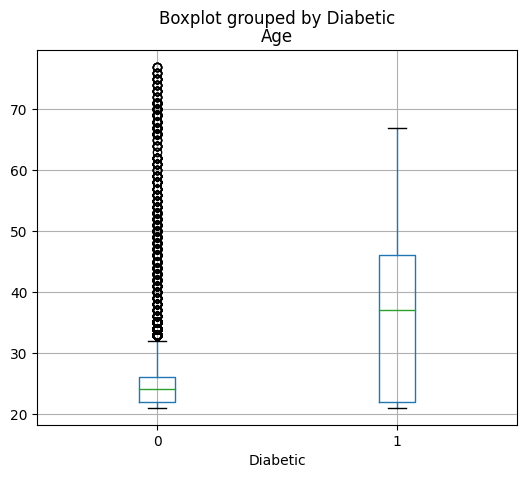

In [7]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

We can see based on the number of pregnancies, BMI or age, we are able to estimate, and going further - assign the probability of being diabetic.

Another visualization that will allow us to assess whether a given variable affects whether someone is diabetic are **histograms** depending on our dependent variable.

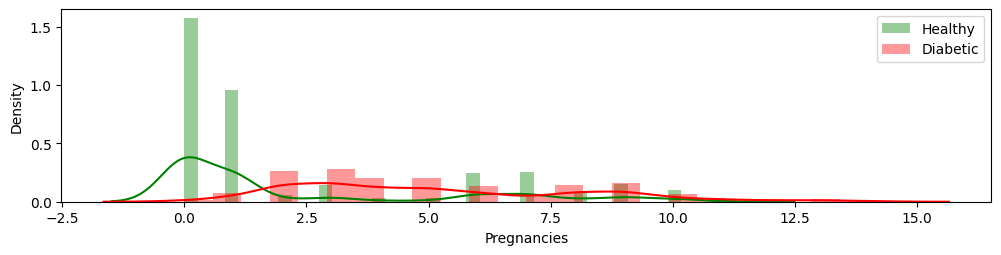

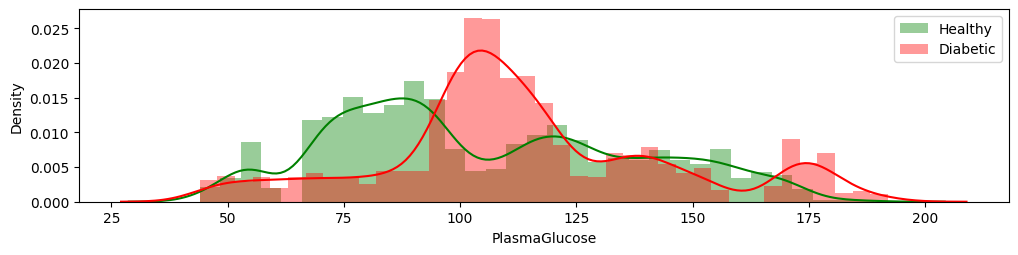

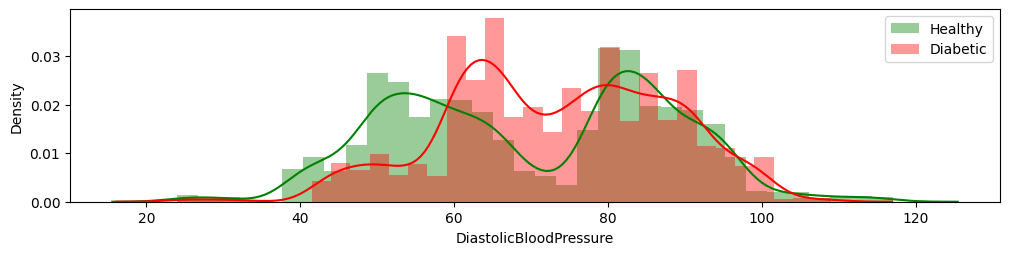

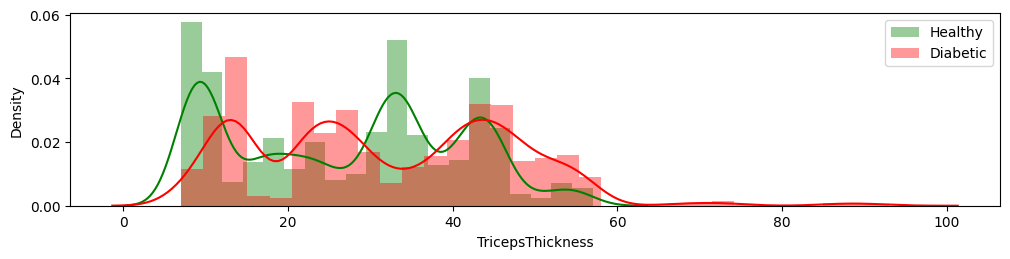

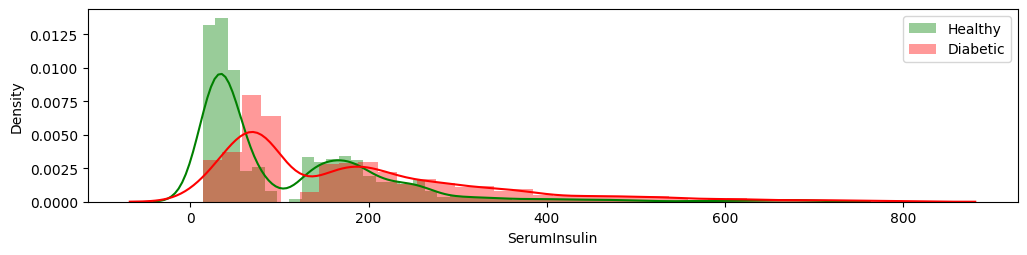

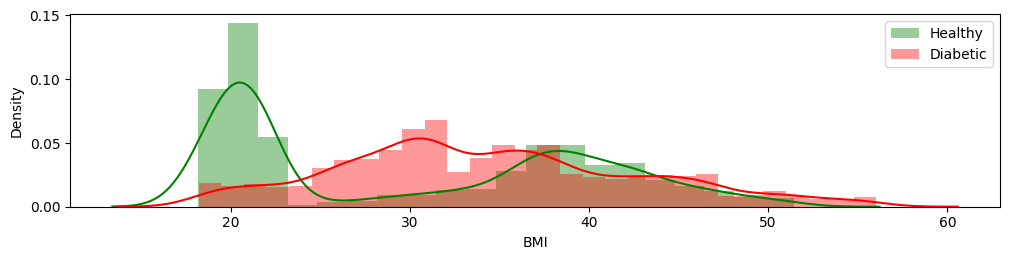

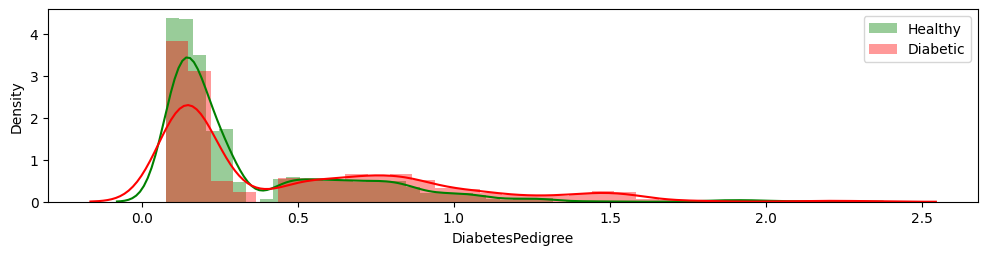

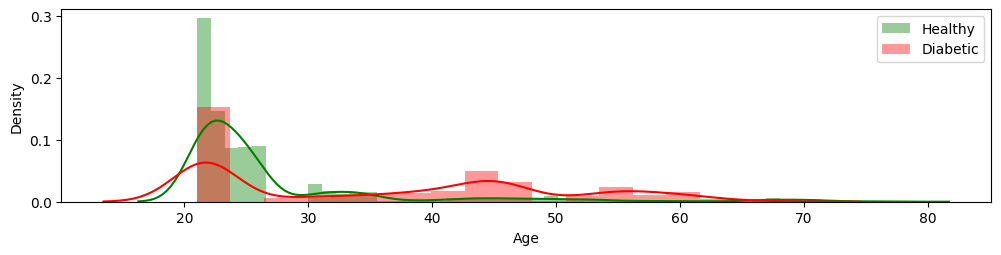

In [8]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Healthy')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Diabetic')
    plt.legend(loc='upper right')
    plt.show()

In general, we can observe that with the increase of a given feature value, the probability of developing diabetes increases.

We check whether the features convey the same information.

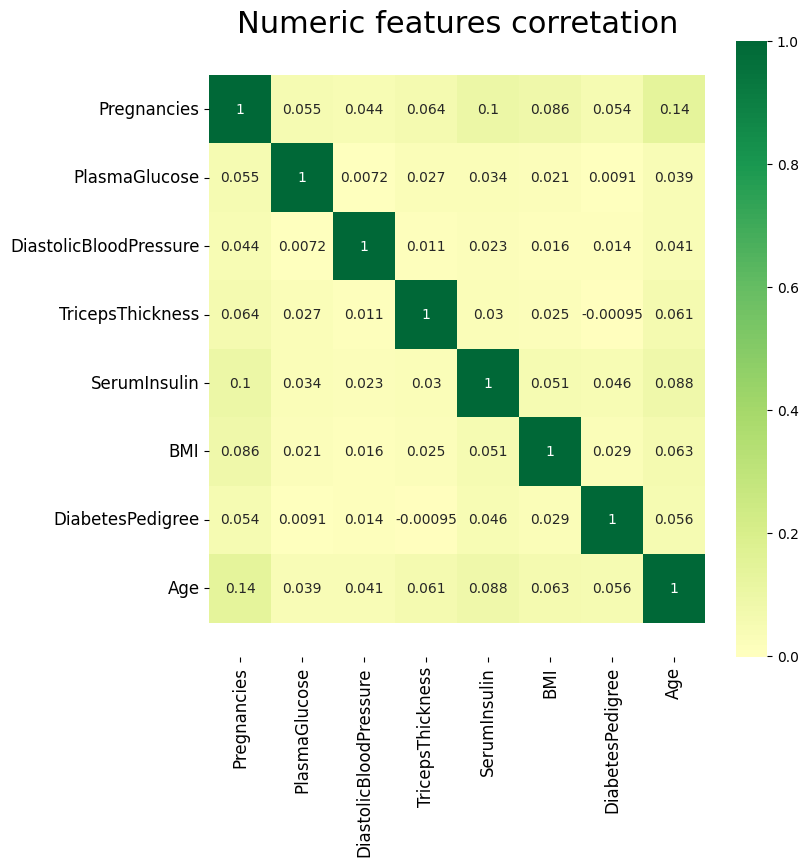

In [9]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Numeric features corretation', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

To calculate the correlation between a numeric and categorical variable, we can use the **Point-biserial correlation coefficient**. We will use the scipy library.

In [10]:
from scipy import stats

corr_dict = {}
for col in features:
  corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

We confirm the conclusions already drawn - **diabetes is most dependent on pregnancy and age**.

Now we will split the data into training and test sets. First, we deal with the classification based on the two features just mentioned. Then use the **stratify** parameter and assign **y** there, so that both sets contain approximately the same percentage of samples from each class.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print('Training observations: %d\nTest observations: %d' % (X_train.shape[0], X_test.shape[0]))

Training observations: 10500
Test observations: 4500


## **Logistic Regression**

For the **classification** problem, we cannot use a linear regression model, but a model that tries to separate the two classes on the basis of features (in this case, a straight line). So we use **logistic regression**, which assigns a probability to the observations. If the probability is greater than **50%**, the model selects **class 1**, otherwise **class 0**. The method of operation is identical to the operation of the linear regression model, it also receives features at the input and coefficients are learned. The coefficients are the weights of the model and the model calculates the weighted sum of the independent variables with the intercept, but at the output we do not get this value as in linear regression, only the value goes to the **logistic function**. The output of the logistic regression model takes the shape of a curve resembling the letter ‘S’ and ranges from **0** to **1**.

Logistic regression is a parametric model, so the variables should be on the same scale. Before training the model, we will create a new **standardized X** for the training and test sets based on the **mean** and **deviation** from the training set.


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

Before we proceed to evaluate our model, we can **visualize** based on what values the model separates the two classes, so we visualize the operation of our classifier.

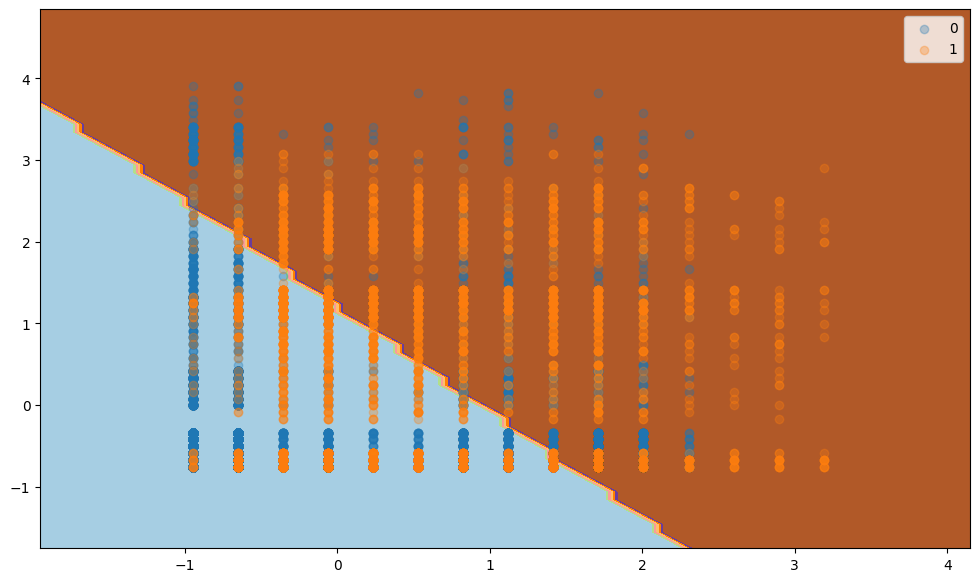

In [13]:
# import the functions
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import  hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
  plt.figure(figsize=(12, 7))

  # define the limits of the set
  min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
  min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

  # scale for both axes
  x1grid = arange(min1, max1, 0.1)
  x2grid = arange(min2, max2, 0.1)

  # create meshgrid
  xx, yy = meshgrid(x1grid, x2grid)

  # transforming the mesh into a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

  # create independent variables for the model
  grid = hstack((r1, r2))

  # prediction of model set
  yhat = trained_model.predict(grid)

  # processing the prediction on a decision for a specific point on the plot
  zz = yhat.reshape(xx.shape)

  # grid visualization with assigned class
  plt.contourf(xx, yy, zz, cmap='Paired')

  # create a scatterplot for the classes in X
  for class_value in range(2):

    # assignment of class (y) to observation (X)
    row_ix = where(y_plot == class_value)

    # create scatterplot
    plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap="Paired", alpha=0.3, label=class_value)

  # plot vizualization
  plt.legend(loc='upper right')
  plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

Observations are not linearly separated. Nevertheless, we can see where there are more observations of a particular class because the points are **transparent**. We could create a better model by using the model's available hyperparameters: the type of regularization (**l1, l2, elasticnet, or None**) and the degree of regularization (**C**).

We check what metrics the model has achieved for the test set.

### **Model evaluation**

In [14]:
# compare predictions with true values
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print("Actual labels: ", y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:  [0 1 0 0 0] [1 1 0 0 0]


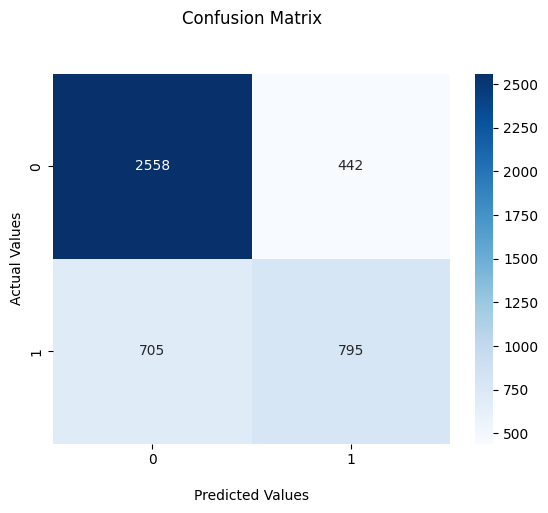

In [15]:
# confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
plt.show()

Our model does not fully cope with the separation of the two classes. When the model points to class **1**, we do not cover all true observations of this class (**low recall**). When the model indicates this class, 425 is also wrong (**poor precision**). Therefore, we will count accuracy, precision, recall and F1 score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print('Precision:', precision_score(y_test, predictions_lr))
print('Recall:', recall_score(y_test, predictions_lr))
print('F1_score:', f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [17]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



Another method of evaluating classifiers are plots of the **ROC (Receiver Operating Characteristi**c) curve and the **AUC (Area Under the Curve)** metric derived from this plot. Classification models can return a probability and this is what the ROC curve uses. By default, classification models have a cut-off of **0.5**, i.e. if the probability is higher than this cut-off then the class is positive, otherwise negative.

**AUC** is the area under the **ROC** curve, and the ROC curve itself is a graph of **TPR** (True Positives Rate - so-called recall) and FPR (False Positives Rate - so-called specificity) depending on the cut-off point. The best model is the one that is closest to the upper left corner of the graph, i.e. we aim for a **TPR of 1** and an **FPR of 0**. The ROC curve through the diagonal is a reflection of the random model for balanced data.

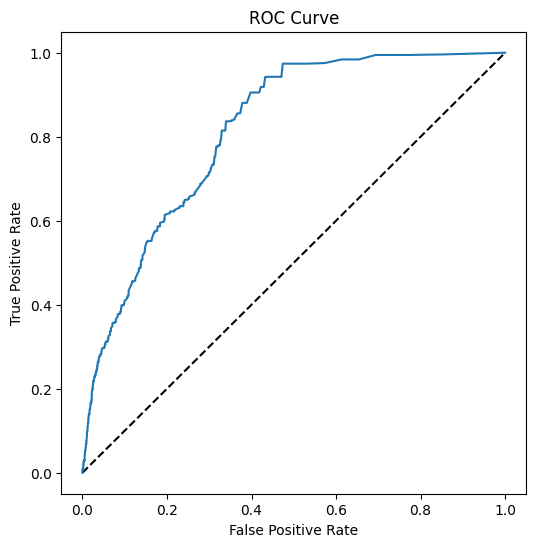

AUC: 0.8164931111111111


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# probability prediction
prediction_probability_lr = model_lr.predict_proba(X_test_standardized)

# calculation of FPR and TPR depending on the cut-off point
fpr, tpr, thresholds = roc_curve(y_test, prediction_probability_lr[:,1])

# ROC Curve visualization
fig = plt.figure(figsize=(6, 6))

# drawing a straight line for a random model
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC calculation
auc = roc_auc_score(y_test, prediction_probability_lr[:,1])
print('AUC: ' + str(auc))

We create a function that calculates the most important metrics and draws graphs. We will use this function when evaluating the next models, so it is worth saving the most important metrics (e.g. f1-score or AUC) of previous models for comparison purposes.

In [19]:
# function that calculates metrics and shows plots
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_name = []
prediction_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
  models.append(model)
  models_name.append(name)
  global metrics_dataframe
  predictions = model.predict(X_checked)
  predictions_proba = model.predict_proba(X_checked)
  prediction_proba_list.append(predictions_proba[:, 1])

  # metrics for the model being checked
  print(classification_report(y_checked, predictions))

  # Confusion matrix
  plt.figure()
  cm = confusion_matrix(y_checked, predictions)
  ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
  ax.set_title('Confusion Matrix\n\n')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values')
  plt.show()

  # plot ROC curve
  fig = plt.figure(figsize=(6, 6))
  plt.plot([0, 1], [0, 1], 'k--')
  for model_selected, name_selected, pred_proba in zip(models, models_name, prediction_proba_list):
    fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
    plt.plot(fpr, tpr, label=name_selected)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  f1_metric = f1_score(y_checked, predictions)
  auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                               ignore_index=True)
  return metrics_dataframe

We give the **function** the trained model, its **name** (this is how we will distinguish models) and **X** and **y** from the **test set**.

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



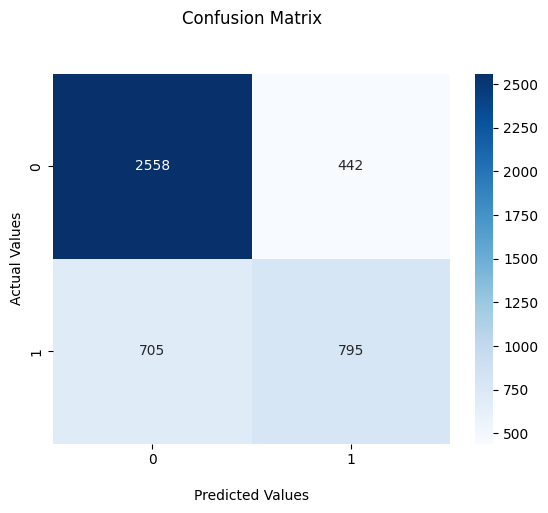

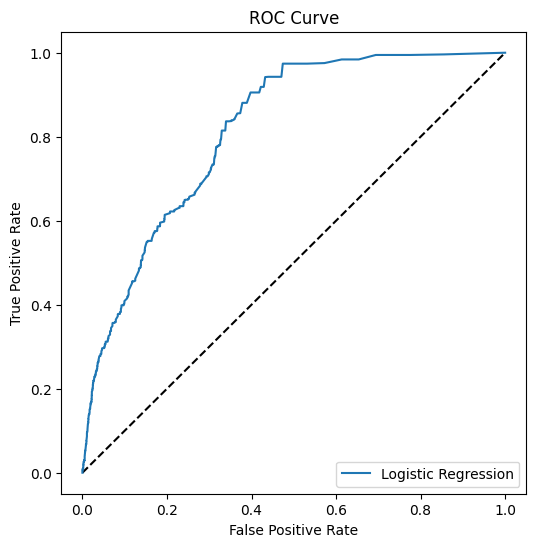

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [20]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

### **Regularization**
To improve our model we perform regularization.
We will check how the model behaves for different **regularizations** and their **degree**. We will **visualize** the operation of the model using the **plot_classification_surface** function and calculate the **F1_score** on the training and test sets each time.

In [21]:
model_lr_l1_liblr = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
model_lr_l1_saga = LogisticRegression(C=0.01, penalty='l1', solver='saga')
model_lr_l2_liblr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
model_lr_l2_ncg = LogisticRegression(C=0.01, penalty='l2', solver='newton-cg')
model_lr_en_saga = LogisticRegression(C=0.01, penalty='elasticnet', solver='saga', l1_ratio=0.3) # elasticnet
model_lr_no_sag = LogisticRegression(C=0.01, penalty=None, solver='sag')

model_lr_l1_liblr.fit(X_train_standardized, y_train)
model_lr_l1_saga.fit(X_train_standardized, y_train)
model_lr_l2_liblr.fit(X_train_standardized, y_train)
model_lr_l2_ncg.fit(X_train_standardized, y_train)
model_lr_en_saga.fit(X_train_standardized, y_train)
model_lr_no_sag.fit(X_train_standardized, y_train)

LogisticRegression(C=0.01, penalty=None, solver='sag')

In [22]:
models = [model_lr_l1_liblr,
          model_lr_l1_saga,
          model_lr_l2_liblr,
          model_lr_l2_ncg,
          model_lr_en_saga,
          model_lr_no_sag]

labels = ['model_lr_l1_liblr',
          'model_lr_l1_saga',
          'model_lr_l2_liblr',
          'model_lr_l2_ncg',
          'model_lr_en_saga',
          'model_lr_no_sag']

f1_score_train_set = []
f1_score_test_set = []

for model in models:
  prediction_train = model.predict(X_train_standardized)
  prediction_test = model.predict(X_test_standardized)
  f1_score_train_set.append(f1_score(y_train, prediction_train).round(2))
  f1_score_test_set.append(f1_score(y_test, prediction_test).round(2))

df = pd.DataFrame(index=labels)
df['F1 score train set'] = f1_score_train_set
df['F1 score test set'] = f1_score_test_set
df

,F1 score train set,F1 score test set
model_lr_l1_liblr,0.55,0.58
model_lr_l1_saga,0.54,0.57
model_lr_l2_liblr,0.55,0.58
model_lr_l2_ncg,0.54,0.57
model_lr_en_saga,0.54,0.57
model_lr_no_sag,0.55,0.58


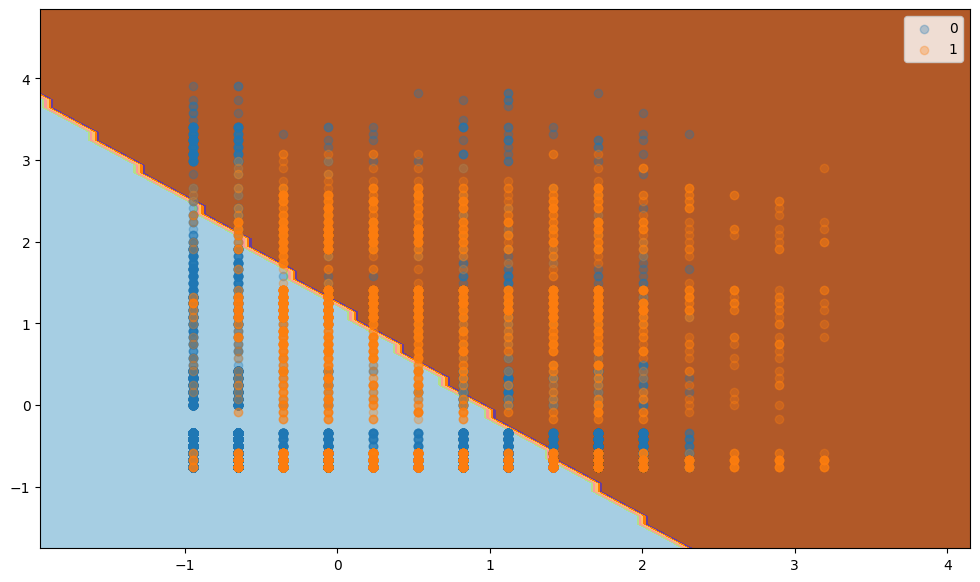

In [23]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1_liblr)

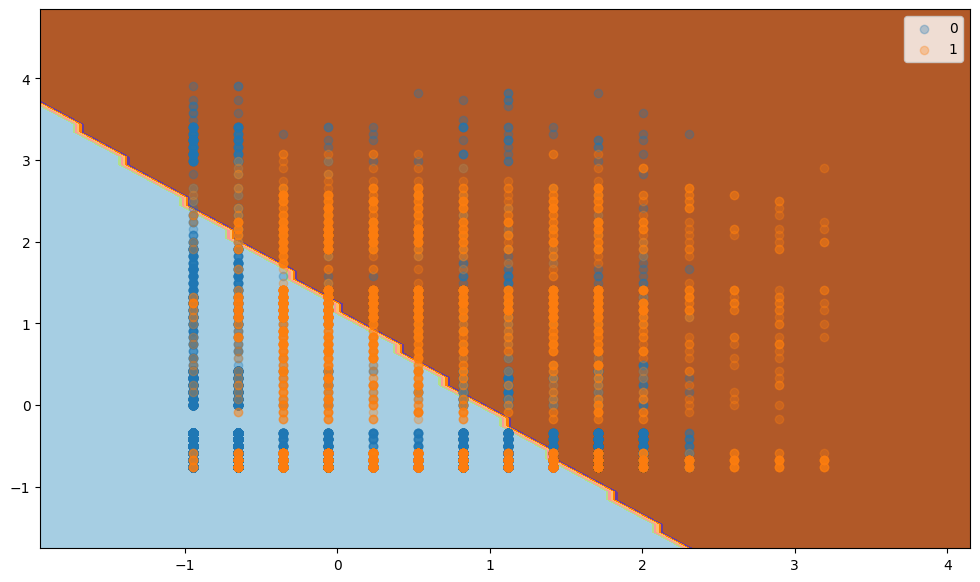

In [24]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2_liblr)

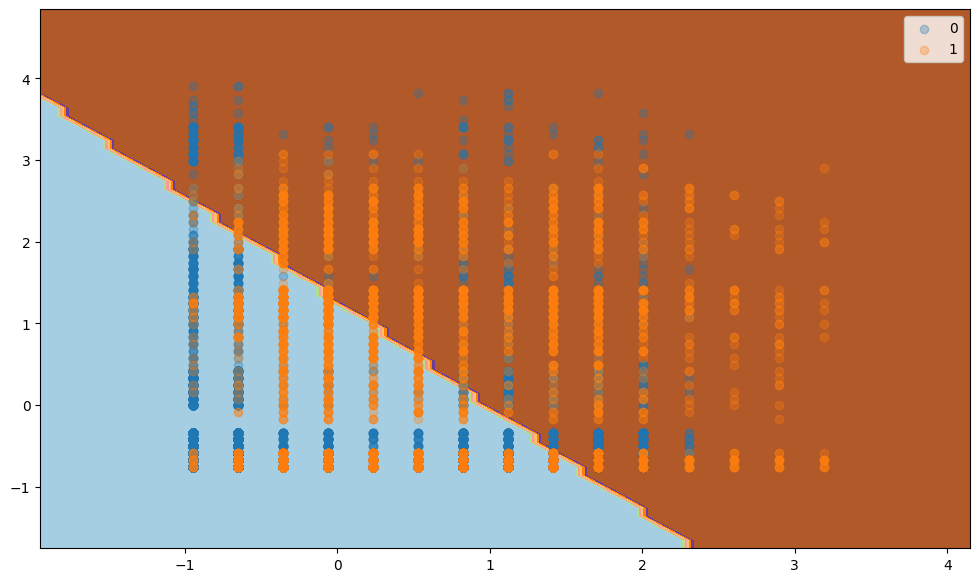

In [25]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_en_saga)

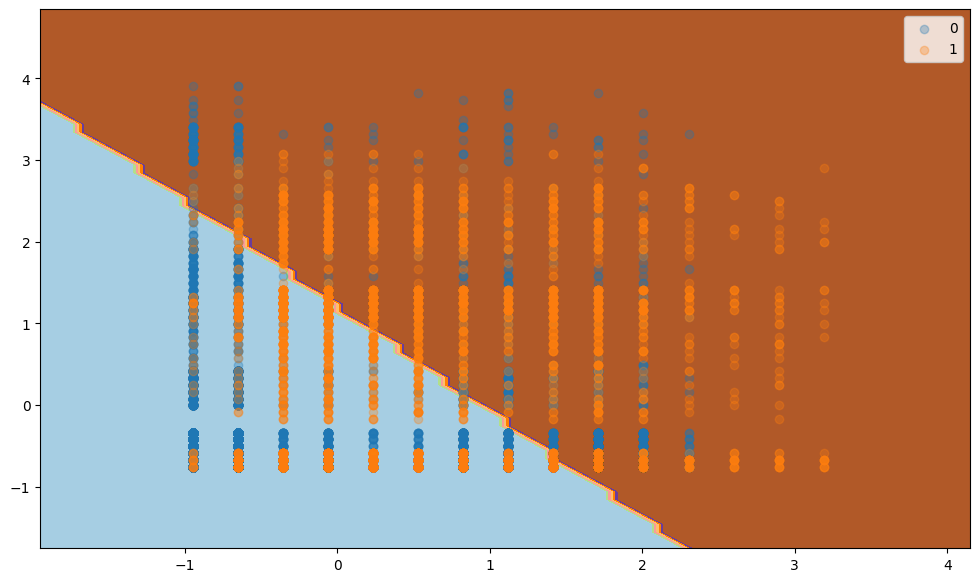

In [26]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_no_sag)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



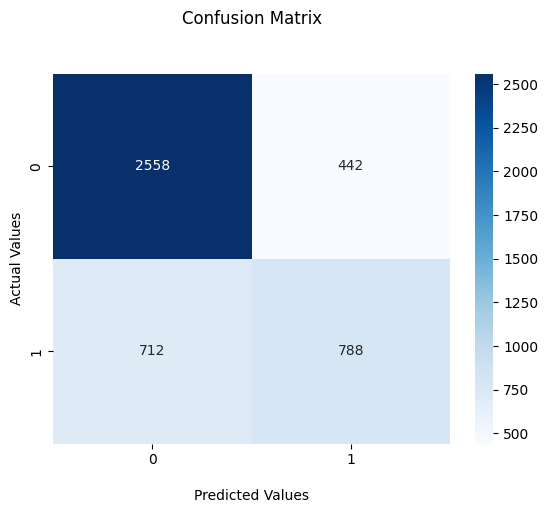

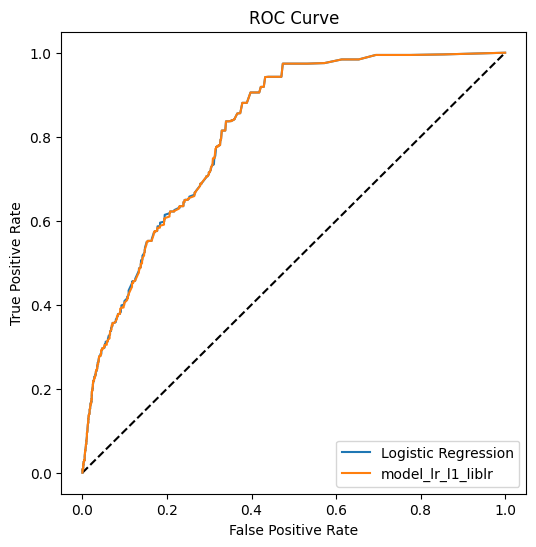

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



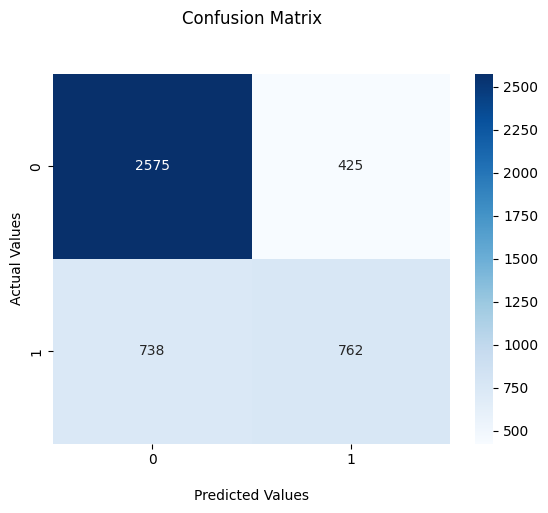

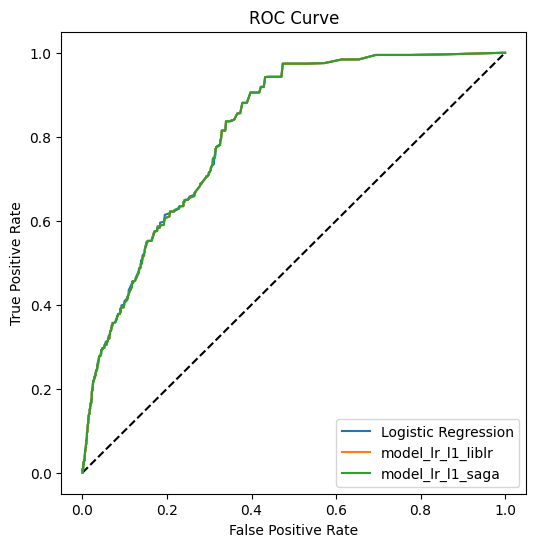

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



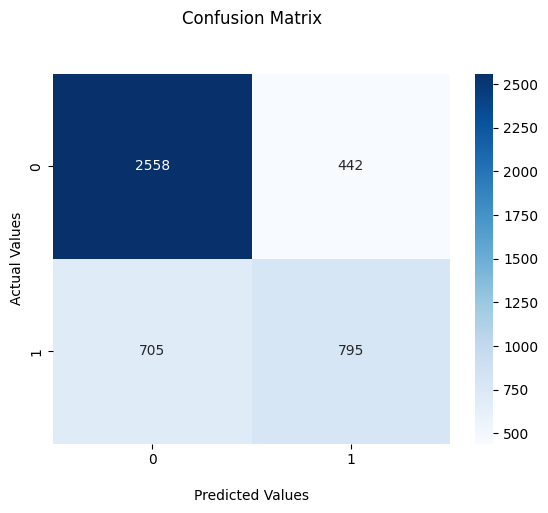

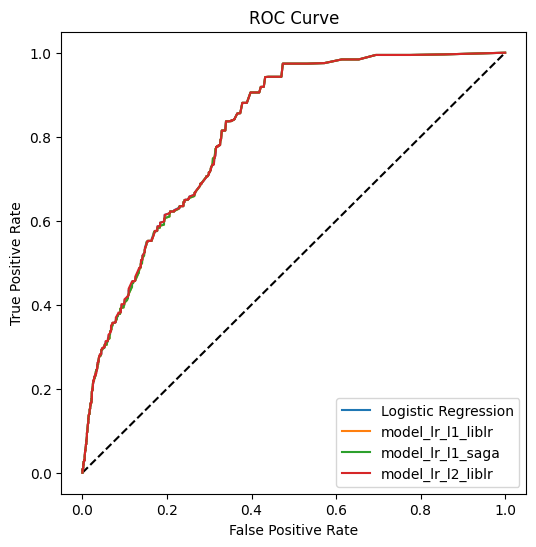

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



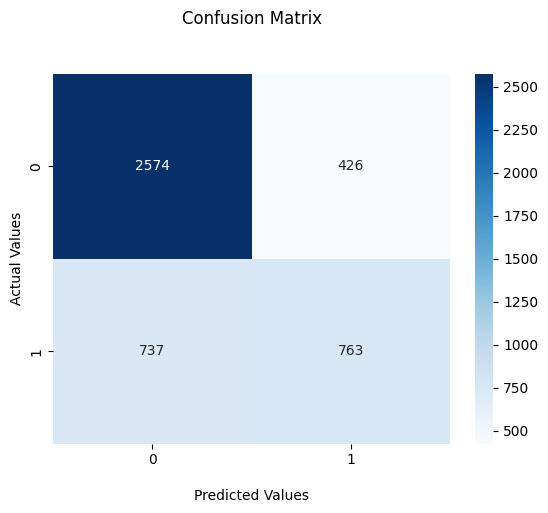

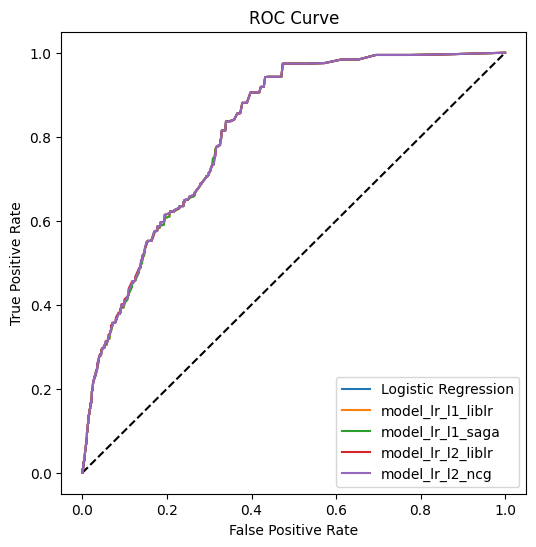

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



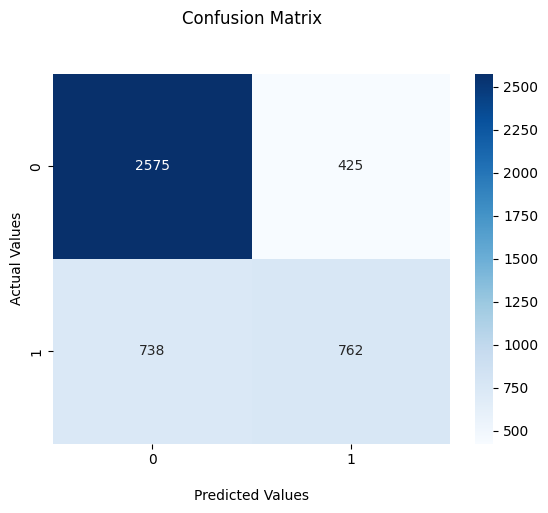

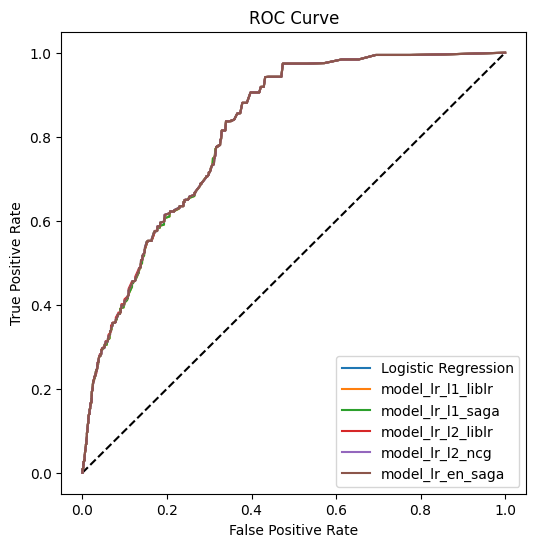

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



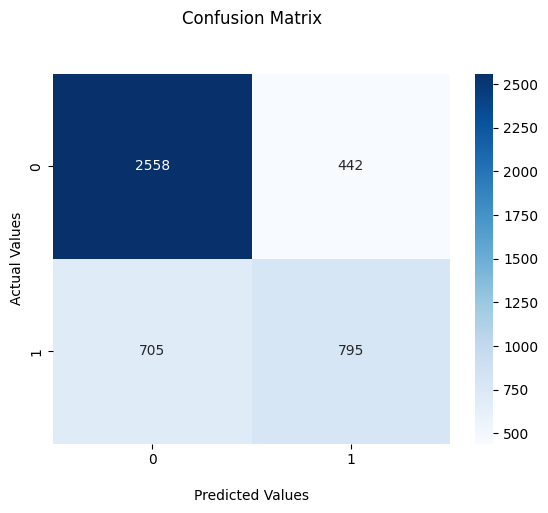

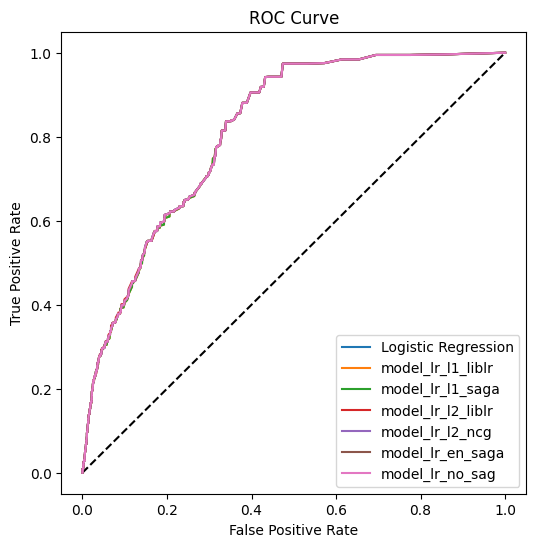

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,model_lr_l1_liblr,0.577289,0.816045
2,model_lr_l1_saga,0.567175,0.816049
3,model_lr_l2_liblr,0.580928,0.816640
4,model_lr_l2_ncg,0.567497,0.816493
5,model_lr_en_saga,0.567175,0.816494
6,model_lr_no_sag,0.580928,0.816493


In [27]:
calculate_metrics(model_lr_l1_liblr, 'model_lr_l1_liblr', X_test_standardized, y_test)
calculate_metrics(model_lr_l1_saga, 'model_lr_l1_saga', X_test_standardized, y_test)
calculate_metrics(model_lr_l2_liblr, 'model_lr_l2_liblr', X_test_standardized, y_test)
calculate_metrics(model_lr_l2_ncg, 'model_lr_l2_ncg', X_test_standardized, y_test)
calculate_metrics(model_lr_en_saga, 'model_lr_en_saga', X_test_standardized, y_test)
calculate_metrics(model_lr_no_sag, 'model_lr_no_sag', X_test_standardized, y_test)